# ATMS 391: Advanced Geophysical Data Analysis
# Homework 6: `matplotlib` and `basemap`
---

## Problem 1

(a) From the data in Homework 5 (`gistemp1200_ERSSTv4.nc`), use `contour` to plot a global map of the the temperature anomalies for the year you were born (make an annual average for the calendar year).  Make sure that the contours are labeled and the title indicates the month you are plotting.  Use a colorbar that goes from cool colors for lower than average temperature anomalies and warm colors for above average temperature anomalies.

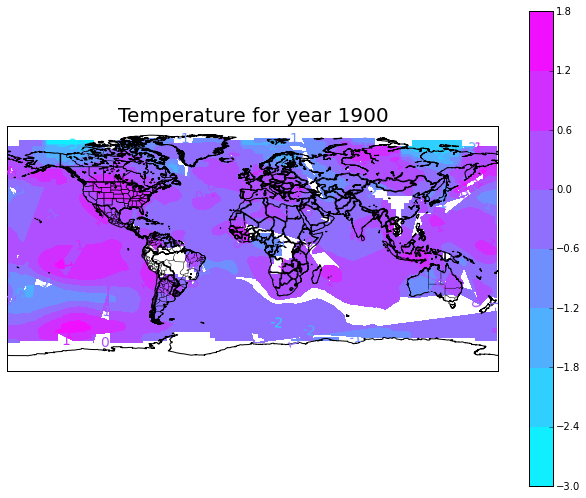

In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import xray
import numpy as np

data=xray.open_dataset("gistemp1200_ERSSTv4.nc")
lat_1d = data.variables['lat']
lon_1d = data.variables['lon']
lat_1d = lat_1d[:].squeeze()
lon_1d = lon_1d[:].squeeze()
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)

data_ann = data['tempanomaly'].resample('12MS', dim='time', how='mean')
date = np.datetime64('1900-01-01')
data_ann_year = data_ann[data_ann['time'] == date]

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, data_ann_year.values.squeeze(),cmap='cool')
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()

map.drawstates()

map.drawcountries(linewidth=1.5)

# Make a title with the time value
plt.title('Temperature for year 1900', fontsize=20)
plt.colorbar()
plt.show()

(b) Repeat (a) using `pcolormesh`.  Include a colorbar.

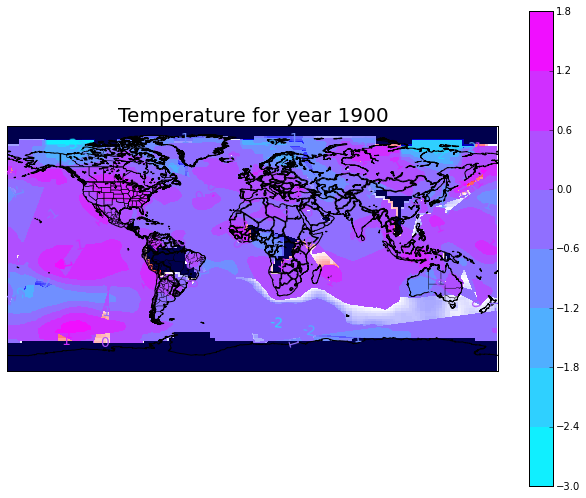

In [2]:
fig=plt.figure(figsize=(11,8.5))
map = Basemap(resolution='l', projection='cyl')
map.pcolormesh(lon_2d, lat_2d, data_ann_year.values.squeeze(),cmap='seismic',vmin=-3,vmax=3)
CS=map.contourf(lon_2d, lat_2d, data_ann_year.values.squeeze(),cmap='cool')
plt.clabel(CS,inline=1, fontsize=14, fmt='%1.0f')

map.drawcoastlines()

map.drawstates()

map.drawcountries(linewidth=1.5)

plt.colorbar()

# Make a title with the time value
plt.title('Temperature for year 1900', fontsize=20)

plt.show()

---
## Problem 2

From the data in Week 6, exercise 2, make a map of the **Convective Available Potential Energy** from the GFS 24 hour forecast valid at **00 Z on the 27th of September** over the **Tropics** (-20S to 20N, all longitudes).  Choose a colormap we haven't used yet and you like.  Use `contourf` to contour the data from 0 to 2500 J/kg.  Specify a contour interval.  Make sure the plot is labeled with the forecast hour and the field plotted.

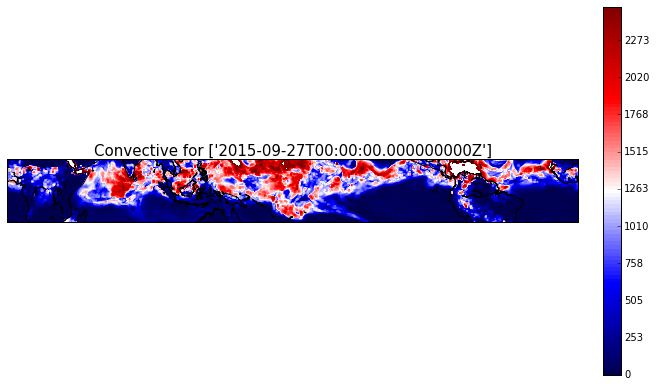

In [8]:
data=xray.open_dataset("gfs.150926.00Z.nc4")

date1 = np.datetime64('2015-09-27')
var = 'Convective_available_potential_energy_surface'

time_1d = data.variables['time']
lat_1d = data.variables['lat']
lon_1d = data.variables['lon']


temp_2d = data[var][date1==data.time,:,:].values.squeeze()
lat_1d = lat_1d[:].squeeze()
lon_1d = lon_1d[:].squeeze()
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)
full_lat_1d = lat_2d.flatten()
full_lon_1d = lon_2d.flatten()

lonlat_list = zip(full_lon_1d, full_lat_1d)

fig=plt.figure(figsize=(11,8.5))  #width, height in inches

map = Basemap(llcrnrlat=-20,urcrnrlat=20,llcrnrlon=0,urcrnrlon=360,resolution='l',projection='cyl')

levels=np.linspace(0,2500,100)
map.contourf(lon_2d, lat_2d, temp_2d,levels,cmap='seismic')

map.drawcoastlines()

plt.colorbar(fraction=0.03, pad=0.04)

time_val = data['time'][date1==data.time].values.astype('str')

plt.title('Convective' + ' for '  + str(time_val), fontsize=15)

plt.show()